# Effect Size Comparison

In this notebook we intend to show how can be used the library `IDEAL-GENOM` to generate a Beta vs Beta plot to compare effect size of two different **GWAS**. 

In [1]:
import sys
import os

import pandas as pd

# add parent directory to path
library_path = os.path.abspath('..')
if library_path not in sys.path:
    sys.path.append(library_path)

from ideal_genom.visualization.plots import beta_beta_draw
from ideal_genom.get_examples import get_bmi_japanese_gwas

At the end of the next cell, please fill the required values. The notebook could be modified according to the user interest and particular requirements, nevertheless in order to use as it is, the user should have the following specifications in mind. It is expected that all files are tab-separated-values, but the user can change this easily on the corresponding cell.

1. `input_path` is the path to the folder where the necessary files to draw the plot are.
2. `gwas1_name` is the name of the file containing the first **GWAS** summary statistics.
3. `gwas2_name` is the name of the file containing the second **GWAS** summary statistics.

In [2]:
gwas_f, gwas_m = get_bmi_japanese_gwas()

INFO:ideal_genom.get_examples:Downloading file: https://humandbs.dbcls.jp/files/hum0014/hum0014.v6.158k.v1.zip to /home/luis/CGE/ideal-genom/data/sumstats/hum0014.v6.158k.v1.zip
INFO:ideal_genom.get_examples:Extracting file: /home/luis/CGE/ideal-genom/data/sumstats/hum0014.v6.158k.v1.zip
INFO:ideal_genom.get_examples:Extracting file: /home/luis/CGE/ideal-genom/data/sumstats/hum0014.v6.158k.v1.zip
INFO:ideal_genom.get_examples:Decompressing file: /home/luis/CGE/ideal-genom/data/sumstats/Female_2017_BMI_BBJ_autosome.txt.gz


Extracted: /home/luis/CGE/ideal-genom/data/sumstats/Female_2017_BMI_BBJ_autosome.txt.gz
Extracted: /home/luis/CGE/ideal-genom/data/sumstats/Male_2017_BMI_BBJ_autosome.txt.gz
Deleted ZIP file: /home/luis/CGE/ideal-genom/data/sumstats/hum0014.v6.158k.v1.zip


INFO:ideal_genom.get_examples:Decompressing file: /home/luis/CGE/ideal-genom/data/sumstats/Male_2017_BMI_BBJ_autosome.txt.gz


Decompressed: /home/luis/CGE/ideal-genom/data/sumstats/Female_2017_BMI_BBJ_autosome.txt
Removed original .gz file: /home/luis/CGE/ideal-genom/data/sumstats/Female_2017_BMI_BBJ_autosome.txt.gz
Decompressed: /home/luis/CGE/ideal-genom/data/sumstats/Male_2017_BMI_BBJ_autosome.txt
Removed original .gz file: /home/luis/CGE/ideal-genom/data/sumstats/Male_2017_BMI_BBJ_autosome.txt.gz


In [15]:
df_F = pd.read_csv(gwas_f, sep='\t')
df_F = df_F[df_F['P'] < 5e-8].reset_index(drop=True)
df_M = pd.read_csv(gwas_m, sep='\t')
df_M = df_M[df_M['P'] < 5e-8].reset_index(drop=True)

Please, provide the columns to load from the **GWAS** summary statistics. The essential columns are those that contains rsID, p_value, beta (effect_size) and se (standard error). It is important to remark that columns names most coincide in both files, at least for the four columns that will be used to generate the effect size plot.

In [16]:
df_F

,SNP,CHR,POS,REF,ALT,Frq,Rsq,BETA,SE,P
0,rs10061263,5,124289158,G,C,0.5082,0.997,0.02870,0.005244,4.443000e-08
1,rs10062657,5,95867908,C,A,0.5947,0.866,-0.03348,0.005744,5.582000e-09
2,rs10072357,5,124287950,A,G,0.5079,0.999,0.02864,0.005237,4.547000e-08
3,rs10073890,5,124288028,A,G,0.5080,0.998,0.02866,0.005239,4.512000e-08
4,rs10074013,5,124288193,A,G,0.5081,0.997,0.02868,0.005242,4.477000e-08
...,...,...,...,...,...,...,...,...,...,...
943,rs9941349,16,53825488,C,T,0.2316,0.985,0.06619,0.006263,4.114000e-26
944,rs9947403,18,57869750,C,T,0.2085,0.999,0.04183,0.006433,7.872000e-11
945,rs9954728,18,57801557,C,G,0.1703,0.953,0.04400,0.007098,5.695000e-10
946,rs9966911,18,57845548,C,G,0.2338,0.959,0.04082,0.006311,9.958000e-11


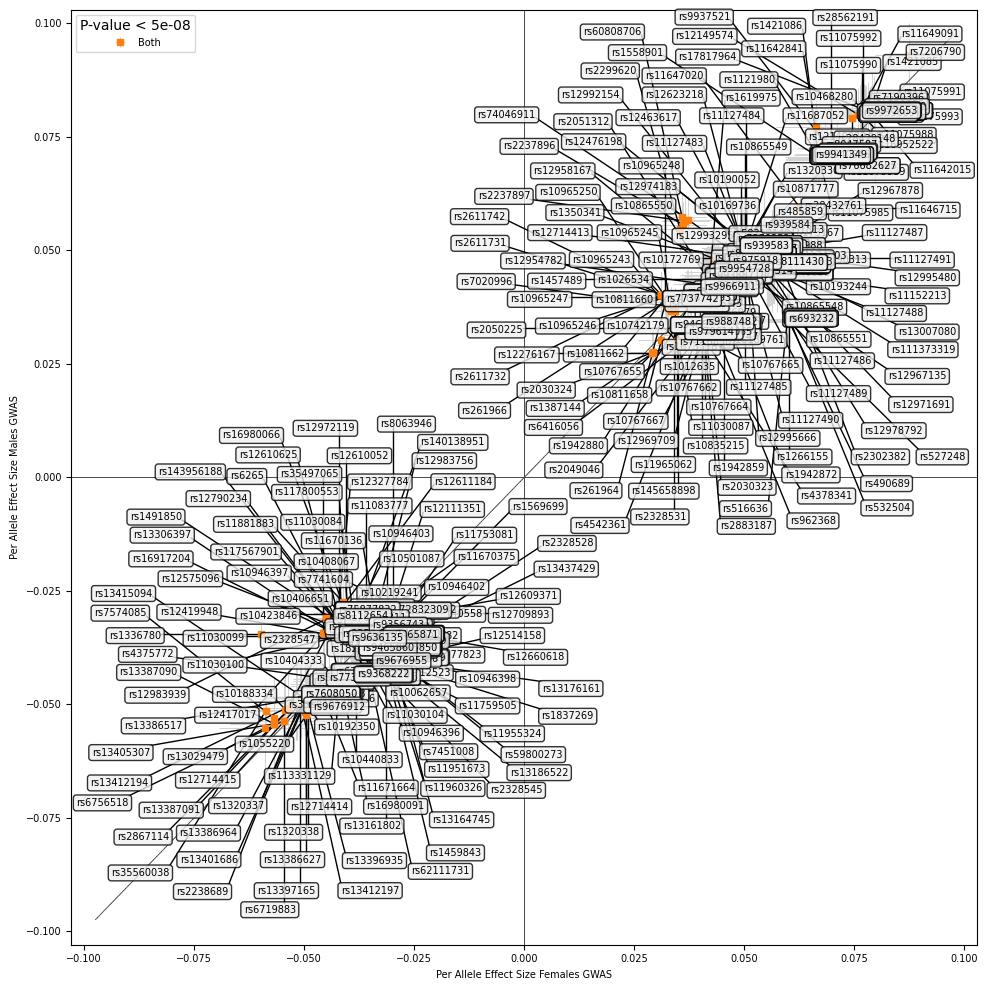

True

In [17]:
beta_beta_draw(
    gwas_1  = df_F,
    gwas_2  = df_M,
    snp_col ='SNP',
    p_col   ='P',
    beta_col='BETA',
    se_col  ='SE',
    label_1 ='Females',
    label_2 ='Males',
    plot_dir=gwas_f.parent.as_posix(),
    save_name='beta_beta.pdf'
    )